#  Analysis_5   disaster of Titanic

## Analysis the SibSp and Parch related survival

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Load data

In [12]:
raw_data = pd.read_csv('..\data\Titanic.csv',na_values='N/A')  #,index_col=0
raw_data.tail()
#sibsp----  of siblings / spouses aboard the Titanic	
#parch---- of parents / children aboard the Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# keep the needed attributes
deal_data = raw_data[['PassengerId','Survived','Pclass','SibSp','Parch']]
deal_data.head()

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0


In [11]:
deal_data['SibSp'].isnull().sum()

0

In [17]:
deal_data['Parch'].isnull().sum()

0

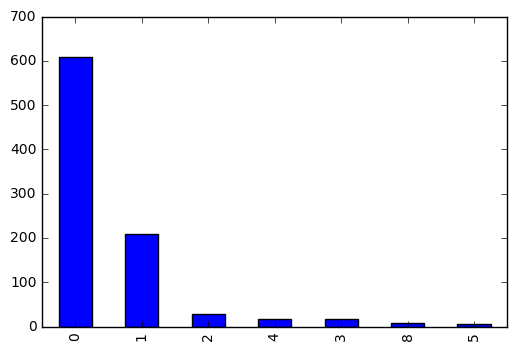

In [8]:
# to draw the account of SibSp
deal_data['SibSp'].value_counts().plot(kind='bar')


In [10]:
# count value of Sibsp and survival
SibSp_data = pd.crosstab(deal_data.SibSp,deal_data.Survived,margins=True)
SibSp_data

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [15]:
# count probability of  Sibsp and survival
SibSp_data2 = pd.crosstab(deal_data.SibSp,deal_data.Survived,margins=True).apply(lambda x : x/float(x[-1]),axis=1)
SibSp_data2
# we can coclude that with 1 to 2 Sibsp,the survival probability is higher。And without sibsp，the probability of dead is higher

Survived,0,1,All
SibSp,,,
0,0.654605,0.345395,1.0
1,0.464115,0.535885,1.0
2,0.535714,0.464286,1.0
3,0.750000,0.250000,1.0
4,0.833333,0.166667,1.0
5,1.000000,0.000000,1.0
8,1.000000,0.000000,1.0
All,0.616162,0.383838,1.0


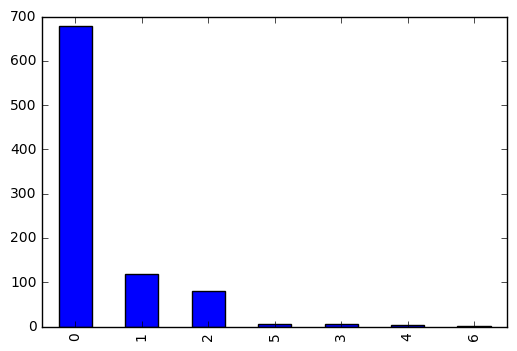

In [16]:
# to draw the account of Parch
deal_data['Parch'].value_counts().plot(kind='bar')

In [18]:
# count value of Parch and survival
Parch_data = pd.crosstab(deal_data.Parch,deal_data.Survived,margins=True)
Parch_data

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [19]:
# count probability of Parch and survival
Parch_data2 = pd.crosstab(deal_data.Parch,deal_data.Survived,margins=True).apply(lambda x : x/float(x[-1]),axis=1)
Parch_data2
# we can coclude that with 1 to 2 Parch,the survival probability is higher。And without sibsp，the probability of dead is higher

Survived,0,1,All
Parch,,,
0,0.656342,0.343658,1.0
1,0.449153,0.550847,1.0
2,0.500000,0.500000,1.0
3,0.400000,0.600000,1.0
4,1.000000,0.000000,1.0
5,0.800000,0.200000,1.0
6,1.000000,0.000000,1.0
All,0.616162,0.383838,1.0


In [22]:
full_data = pd.concat([Parch_data2,SibSp_data2],axis = 1)
full_data

Survived,0,1,All,0,1,All
0,0.656342,0.343658,1.0,0.654605,0.345395,1.0
1,0.449153,0.550847,1.0,0.464115,0.535885,1.0
2,0.500000,0.500000,1.0,0.535714,0.464286,1.0
3,0.400000,0.600000,1.0,0.750000,0.250000,1.0
4,1.000000,0.000000,1.0,0.833333,0.166667,1.0
5,0.800000,0.200000,1.0,1.000000,0.000000,1.0
6,1.000000,0.000000,1.0,NaN,NaN,NaN
All,0.616162,0.383838,1.0,0.616162,0.383838,1.0
8,NaN,NaN,NaN,1.000000,0.000000,1.0


In [ ]:
#let find the survival of no SibSp and Parch
